In [43]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten

import numpy as np
import matplotlib.pyplot as plt

In [3]:
Data = [i for i in range(100,200, 6)]

In [4]:
Data[:3]

[100, 106, 112]

In [21]:
X = []
y = []
for i in range(len(Data)-3):
  X.append([Data[i],Data[i+1], Data[i+2]])
  y.append(Data[i+3])
X = np.array(X)
y = np.array(y)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape, y.shape

((14, 3, 1), (14,))

In [45]:
X[0], y[0]

(array([[100],
        [106],
        [112]]), 118)

In [22]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 24s 24s/step - loss: 25939.0176
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 24752.1660
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 23426.6387
Epoch 4/300
1/1 [==============================] - 0s 15ms/step - loss: 21973.4023
Epoch 5/300
1/1 [==============================] - 0s 16ms/step - loss: 20169.9824
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 18294.3926
Epoch 7/300
1/1 [==============================] - 0s 15ms/step - loss: 16741.1465
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 15434.6230
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 14259.6621
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 13199.5176
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 12167.3525
Epoch 12/300
1/1 [==============================] - 0s 9ms/step - loss: 11116.1123
Epo

In [53]:
# temp = np.array([100, 106, 112]).reshape(1, 3, 1)
pred_n = X[-1]
temp = X[-1].reshape(1, 3, 1)
# prd = model.predict(aa)
while True:
  prd = model.predict(temp)
  pred_n= np.append(pred_n, prd)
  print('Data', temp[0][0], temp[0][1], temp[0][2], 'Output', np.round(prd[0]))
  if prd >300:
    break
  temp = np.round(np.array([temp[0][1], temp[0][2], prd[0]]).reshape(1, 3, 1), 0)

Data [178] [184] [190] Output [196.]
Data [184.] [190.] [196.] Output [202.]
Data [190.] [196.] [202.] Output [209.]
Data [196.] [202.] [209.] Output [215.]
Data [202.] [209.] [215.] Output [221.]
Data [209.] [215.] [221.] Output [228.]
Data [215.] [221.] [228.] Output [235.]
Data [221.] [228.] [235.] Output [241.]
Data [228.] [235.] [241.] Output [248.]
Data [235.] [241.] [248.] Output [255.]
Data [241.] [248.] [255.] Output [262.]
Data [248.] [255.] [262.] Output [270.]
Data [255.] [262.] [270.] Output [277.]
Data [262.] [270.] [277.] Output [285.]
Data [270.] [277.] [285.] Output [293.]
Data [277.] [285.] [293.] Output [301.]


<function matplotlib.pyplot.show>

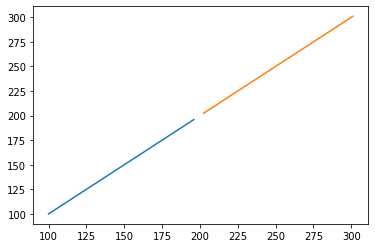

In [62]:
plt.plot(Data, Data)
plt.plot(pred_n[4:], pred_n[4:])3
plt.show